# 01 - Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
covid_train_df = pd.read_csv('./covid_train_tratado.csv')
covid_test_df = pd.read_csv('./covid_test_tratado.csv')

In [3]:
covid_train_df.shape, covid_test_df.shape

((969640, 7), (311670, 6))

In [4]:
covid_train_df.head()

,Unnamed: 0,Country_Region,Population,Weight,Date,Target,TargetValue
0,0,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,1,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,2,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,3,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,4,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [5]:
covid_test_df.head()

,Unnamed: 0,Country_Region,Population,Weight,Date,Target
0,0,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,1,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,2,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
3,3,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
4,4,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


In [6]:
# !pip install prophet

In [7]:
from prophet import Prophet

In [8]:
date = covid_test_df['Date']

In [9]:
date

0         2020-04-27
1         2020-04-27
2         2020-04-28
3         2020-04-28
4         2020-04-29
             ...    
311665    2020-06-08
311666    2020-06-09
311667    2020-06-09
311668    2020-06-10
311669    2020-06-10
Name: Date, Length: 311670, dtype: object

In [10]:
sales_df_conf = covid_train_df.groupby('Date', as_index=False)['TargetValue'].sum()
sales_df_test = covid_test_df.groupby('Date', as_index=False)['Country_Region'].sum()

In [11]:
sales_df_test.drop(['Country_Region'], axis=1, inplace=True)
sales_df_test.columns = ['ds']

sales_df_test.values

array([['2020-04-27'],
       ['2020-04-28'],
       ['2020-04-29'],
       ['2020-04-30'],
       ['2020-05-01'],
       ['2020-05-02'],
       ['2020-05-03'],
       ['2020-05-04'],
       ['2020-05-05'],
       ['2020-05-06'],
       ['2020-05-07'],
       ['2020-05-08'],
       ['2020-05-09'],
       ['2020-05-10'],
       ['2020-05-11'],
       ['2020-05-12'],
       ['2020-05-13'],
       ['2020-05-14'],
       ['2020-05-15'],
       ['2020-05-16'],
       ['2020-05-17'],
       ['2020-05-18'],
       ['2020-05-19'],
       ['2020-05-20'],
       ['2020-05-21'],
       ['2020-05-22'],
       ['2020-05-23'],
       ['2020-05-24'],
       ['2020-05-25'],
       ['2020-05-26'],
       ['2020-05-27'],
       ['2020-05-28'],
       ['2020-05-29'],
       ['2020-05-30'],
       ['2020-05-31'],
       ['2020-06-01'],
       ['2020-06-02'],
       ['2020-06-03'],
       ['2020-06-04'],
       ['2020-06-05'],
       ['2020-06-06'],
       ['2020-06-07'],
       ['2020-06-08'],
       ['20

In [12]:
sales_df_test.values


array([['2020-04-27'],
       ['2020-04-28'],
       ['2020-04-29'],
       ['2020-04-30'],
       ['2020-05-01'],
       ['2020-05-02'],
       ['2020-05-03'],
       ['2020-05-04'],
       ['2020-05-05'],
       ['2020-05-06'],
       ['2020-05-07'],
       ['2020-05-08'],
       ['2020-05-09'],
       ['2020-05-10'],
       ['2020-05-11'],
       ['2020-05-12'],
       ['2020-05-13'],
       ['2020-05-14'],
       ['2020-05-15'],
       ['2020-05-16'],
       ['2020-05-17'],
       ['2020-05-18'],
       ['2020-05-19'],
       ['2020-05-20'],
       ['2020-05-21'],
       ['2020-05-22'],
       ['2020-05-23'],
       ['2020-05-24'],
       ['2020-05-25'],
       ['2020-05-26'],
       ['2020-05-27'],
       ['2020-05-28'],
       ['2020-05-29'],
       ['2020-05-30'],
       ['2020-05-31'],
       ['2020-06-01'],
       ['2020-06-02'],
       ['2020-06-03'],
       ['2020-06-04'],
       ['2020-06-05'],
       ['2020-06-06'],
       ['2020-06-07'],
       ['2020-06-08'],
       ['20

In [13]:
sales_df_conf

,Date,TargetValue
0,2020-01-23,196
1,2020-01-24,580
2,2020-01-25,1011
3,2020-01-26,1386
4,2020-01-27,1664
...,...,...
135,2020-06-06,178452
136,2020-06-07,153505
137,2020-06-08,144958
138,2020-06-09,166327


In [14]:
sales_df_conf.columns = ['ds', 'y']

In [15]:
smn = sales_df_conf.iloc[:120,]
smn

,ds,y
0,2020-01-23,196
1,2020-01-24,580
2,2020-01-25,1011
3,2020-01-26,1386
4,2020-01-27,1664
...,...,...
115,2020-05-17,123753
116,2020-05-18,136001
117,2020-05-19,145125
118,2020-05-20,155136


In [16]:
sales_df_conf

,ds,y
0,2020-01-23,196
1,2020-01-24,580
2,2020-01-25,1011
3,2020-01-26,1386
4,2020-01-27,1664
...,...,...
135,2020-06-06,178452
136,2020-06-07,153505
137,2020-06-08,144958
138,2020-06-09,166327


In [17]:
m = Prophet(yearly_seasonality=True)
m.fit(smn)
future = m.make_future_dataframe(periods=20)
forecast = m.predict(future)
# future

13:28:18 - cmdstanpy - INFO - Chain [1] start processing
13:28:18 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future.head()

,ds
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27


In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-23,-4160.578554,-11308.016929,8233.913632,-4160.578554,-4160.578554,2112.015526,2112.015526,2112.015526,8525.939546,8525.939546,8525.939546,-6413.924019,-6413.924019,-6413.924019,0.0,0.0,0.0,-2048.563028
1,2020-01-24,-2735.315258,-8699.556875,11499.222978,-2735.315258,-2735.315258,4503.339947,4503.339947,4503.339947,8286.410684,8286.410684,8286.410684,-3783.070737,-3783.070737,-3783.070737,0.0,0.0,0.0,1768.024690
2,2020-01-25,-1310.051961,-10681.983045,8769.964158,-1310.051961,-1310.051961,115.480137,115.480137,115.480137,1718.549446,1718.549446,1718.549446,-1603.069310,-1603.069310,-1603.069310,0.0,0.0,0.0,-1194.571824
3,2020-01-26,115.211335,-15633.902876,4692.188099,115.211335,115.211335,-4821.406853,-4821.406853,-4821.406853,-4920.560064,-4920.560064,-4920.560064,99.153211,99.153211,99.153211,0.0,0.0,0.0,-4706.195517
4,2020-01-27,1540.474632,-16198.114051,3637.895049,1540.474632,1540.474632,-7476.463899,-7476.463899,-7476.463899,-8787.226759,-8787.226759,-8787.226759,1310.762860,1310.762860,1310.762860,0.0,0.0,0.0,-5935.989267


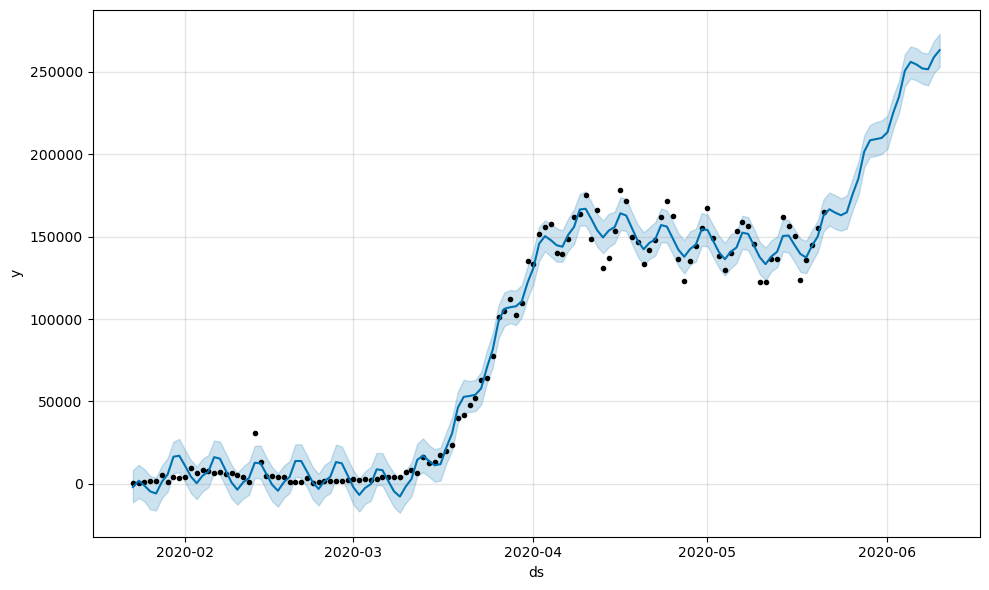

In [20]:
m.plot(forecast);

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
sale_join = pd.merge(sales_df_test, sales_df_conf)
sale_join

,ds,y
0,2020-04-27,122789
1,2020-04-28,134997
2,2020-04-29,144194
3,2020-04-30,155326
4,2020-05-01,167162
5,2020-05-02,149355
6,2020-05-03,138308
7,2020-05-04,129556
8,2020-05-05,139935
9,2020-05-06,153482


In [23]:
# mae = mean_absolute_error(sale_join.y, forecast.yhat)
# print('MAE: %.3f' % mae)

In [24]:
from matplotlib import pyplot

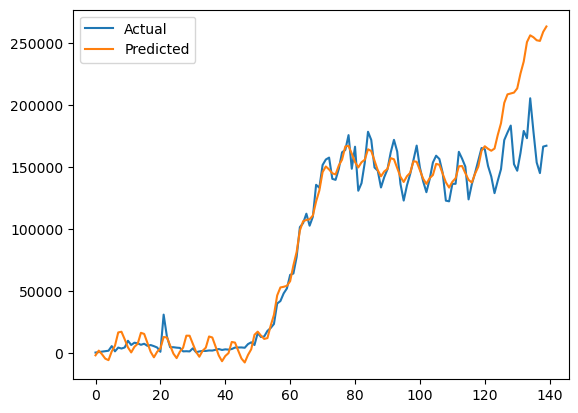

In [25]:
pyplot.plot(sales_df_conf.y, label='Actual')
pyplot.plot(forecast.yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [26]:
sales_df_conf.iloc[-1]

ds    2020-06-10
y         167056
Name: 139, dtype: object

# ARIMA

In [27]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('O conjunto de parâmetros com o AIC mínimo é: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [28]:
smn = sales_df_conf.y
linx = smn[:120,]
linx

0         196
1         580
2        1011
3        1386
4        1664
        ...  
115    123753
116    136001
117    145125
118    155136
119    165199
Name: y, Length: 120, dtype: int64

In [29]:
sarima_grid_search(linx,20)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28427D+01    |proj g|=  8.22453D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.225D-08   1.284D+01
  F =   12.842708038327574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   9.344D-05   8.943D+00
  F =   8.9426246658277879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02812D+01    |proj g|=  1.11712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.02048D+01    |proj g|=  2.07753D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8      9      1     0     0   4.555D-06   1.020D+01
  F =   10.204809270518108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28776D+00    |proj g|=  3.45892D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.02317D+00    |proj g|=  2.58584D-01

At iterate   10    f=  8.66561D+00    |proj g|=  3.51590D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     20      1     0     0   4.580D-05   8.666D+00
  F =   8.6656003488481375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23954D+01    |proj g|=  5.67683D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02488D+01    |proj g|=  1.45999D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   6.505D-06   1.025D+01
  F =   10.248744718325614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82656D+00    |proj g|=  5.64057D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  7.84780D+00    |proj g|=  3.02551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   6.308D-06   7.848D+00
  F =   7.8478041347156564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04325D+01    |proj g|=  1.02145D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.04273D+01    |proj g|=  3.94131D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.744D-05   1.043D+01
  F =   10.427282008885401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05869D+01    |proj g|=  5.89175D-01

At iterate    5    f=  1.02195D+01    |proj g|=  1.27955D-02

At iterate   10    f=  1.02188D+01    |proj g|=  5.50015D-05

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88654D+00    |proj g|=  1.72491D-01

At iterate    5    f=  7.84754D+00    |proj g|=  1.03383D-03


 This problem is unconstrained.



At iterate   10    f=  7.84737D+00    |proj g|=  7.83854D-03

At iterate   15    f=  7.84726D+00    |proj g|=  1.38725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   1.387D-05   7.847D+00
  F =   7.8472553428886638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05391D+01    |proj g|=  1.53726D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.537D-06   1.054D+01
  F =   10.539110584811583     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19082D+00    |proj g|=  3.13491D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.135D-06   7.191D+00
  F =   7.1908239930494773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.



At iterate    5    f=  7.05053D+00    |proj g|=  1.45174D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     14      1     0     0   1.452D-05   7.051D+00
  F =   7.0505323775207973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04533D+01    |proj g|=  7.31904D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79543D+00    |proj g|=  9.01789D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   1.177D-06   8.795D+00
  F =   8.7953938016283608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.



At iterate    5    f=  6.97129D+00    |proj g|=  2.61613D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   2.616D-06   6.971D+00
  F =   6.9712870982506221     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88040D+00    |proj g|=  9.58035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.66299D+00    |proj g|=  2.23155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   4.836D-06   8.662D+00
  F =   8.6624820002916056     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19221D+00    |proj g|=  6.06989D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01091D+00    |proj g|=  1.11562D-01

At iterate    5    f=  6.97230D+00    |proj g|=  1.26936D-01

At iterate   10    f=  6.94426D+00    |proj g|=  6.92720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     16      1     0     0   1.357D-05   6.944D+00
  F =   6.9442646711075984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/max/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.89970D+00    |proj g|=  5.11413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   5.114D-05   9.900D+00
  F =   9.8996979269752376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00067D+00    |proj g|=  7.32745D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.14759D+00    |proj g|=  1.45698D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   1.348D-03   7.147D+00
  F =   7.1474363406704908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08580D+00    |proj g|=  7.68281D-01

At iterate    5    f=  8.87871D+00    |proj g|=  8.63230D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41407D+01    |proj g|=  5.64639D+00

At iterate    5    f=  9.81406D+00    |proj g|=  8.09227D-01

At iterate   10    f=  9.27310D+00    |proj g|=  7.60071D-01

At iterate   15    f=  8.87544D+00    |proj g|=  3.44075D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   3.107D-05   8.875D+00
  F =   8.8752734833763665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56438D+00    |proj g|=  1.04333D+00

At iterate    5    f=  7.18361D+00    |proj g|=  3.10927D-02


 This problem is unconstrained.



At iterate   10    f=  7.12654D+00    |proj g|=  3.44025D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   3.792D-05   7.124D+00
  F =   7.1238942362704121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05374D+01    |proj g|=  1.20748D-03

At iterate    5    f=  1.05374D+01    |proj g|=  3.46219D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.76021D+00    |proj g|=  6.04960D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   9.215D-05   9.760D+00
  F =   9.7601715437151562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88228D+00    |proj g|=  2.10312D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.88222D+00    |proj g|=  7.08802D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   7.088D-06   8.882D+00
  F =   8.8822218353773508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.51956D+00    |proj g|=  1.32890D+00

At iterate    5    f=  7.06367D+00    |proj g|=  1.44940D-01

At iterate   10    f=  7.05809D+00    |proj g|=  8.22967D-05

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.87609D+00    |proj g|=  2.49711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   2.497D-05   8.876D+00
  F =   8.8760887982526153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33965D+01    |proj g|=  5.62076D+00

At iterate    5    f=  9.67024D+00    |proj g|=  4.82636D-01

At iterate   10    f=  9.02563D+00    |proj g|=  6.93772D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.75672D+00    |proj g|=  9.70005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     45      1     0     0   9.700D-05   8.757D+00
  F =   8.7567174575545668     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29065D+00    |proj g|=  3.71696D-01

At iterate    5    f=  7.18805D+00    |proj g|=  7.97213D-02

At iterate   10    f=  7.18747D+00    |proj g|=  4.66347D-06

       

 This problem is unconstrained.



At iterate    5    f=  7.09190D+00    |proj g|=  5.19797D-02

At iterate   10    f=  7.07020D+00    |proj g|=  2.75052D-01

At iterate   15    f=  7.03151D+00    |proj g|=  2.31272D-02

At iterate   20    f=  7.03086D+00    |proj g|=  1.20247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.202D-05   7.031D+00
  F =   7.0308551980137066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07079D+00    |proj g|=  1.23986D-01

At iterate    5    f=  7.05775D+00    |proj g|=  1.99973D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.000D-06   7.058D+00
  F =   7.0577540298775769     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   1.521D-06   8.760D+00
  F =   8.7604858465850377     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76582D+00    |proj g|=  7.96148D-02

At iterate    5    f=  8.75765D+00    |proj g|=  3.10452D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.03040D+00    |proj g|=  7.71174D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     16      1     0     0   7.558D-06   7.030D+00
  F =   7.0302475894490071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14389D+01    |proj g|=  3.41669D-01

At iterate    5    f=  1.04622D+01    |proj g|=  3.71997D-01



 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  1.04477D+01    |proj g|=  9.02490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     33      1     0     0   7.178D-05   1.045D+01
  F =   10.447654283340761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.50987D+00    |proj g|=  3.12409D-01

At iterate    5    f=  8.80681D+00    |proj g|=  2.36372D-01

At iterate   10    f=  8.65902D+00    |proj g|=  4.42893D-02

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.78333D+00    |proj g|=  2.22944D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.907D-05   8.783D+00
  F =   8.7831160028140314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97950D+00    |proj g|=  2.19338D-01

At iterate    5    f=  6.96882D+00    |proj g|=  2.00690D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   2.483D-05   8.754D+00
  F =   8.7537753236857547     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51269D+00    |proj g|=  3.09346D-01


 This problem is unconstrained.



At iterate    5    f=  8.88005D+00    |proj g|=  3.72030D-01

At iterate   10    f=  8.68474D+00    |proj g|=  1.26919D-01

At iterate   15    f=  8.66941D+00    |proj g|=  1.15377D-02

At iterate   20    f=  8.66698D+00    |proj g|=  1.46964D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   1.513D-05   8.667D+00
  F =   8.6669544367515847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.08858D+00    |proj g|=  3.97445D-02

At iterate   10    f=  7.08689D+00    |proj g|=  1.83865D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   3.908D-06   7.087D+00
  F =   7.0868917587701947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01571D+00    |proj g|=  2.47278D-01


 This problem is unconstrained.



At iterate    5    f=  6.98878D+00    |proj g|=  6.17551D-02

At iterate   10    f=  6.93856D+00    |proj g|=  8.92731D-03

At iterate   15    f=  6.93818D+00    |proj g|=  7.02197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   9.754D-06   6.938D+00
  F =   6.9381811344266051     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The set of parameters with the minimum AIC is: SARIMA(0, 1, 1)x(1, 1, 1, 20) - AIC:1674.6235210658235


In [30]:


# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    return results

In [31]:
model = sarima_eva(linx,(1, 1, 1),(1, 1, 0, 20))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10142D+00    |proj g|=  2.32889D-01

At iterate    5    f=  7.08858D+00    |proj g|=  3.97445D-02


 This problem is unconstrained.



At iterate   10    f=  7.08689D+00    |proj g|=  1.83865D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   3.908D-06   7.087D+00
  F =   7.0868917587701947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [32]:
sales_df_test.head()

,ds
0,2020-04-27
1,2020-04-28
2,2020-04-29
3,2020-04-30
4,2020-05-01


In [33]:
### Graphs without the confident interval 
pred_uc = model.get_forecast(steps=20)
# ax = smn.plot(label='observed', figsize=(14, 7))
print(pred_uc.predicted_mean)
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.set_xlabel('Date')
# ax.set_ylabel(smn.name)

# plt.legend()
# plt.show()

120    156514.520859
121    139220.745486
122    134193.212841
123    146633.081475
124    163122.009720
125    165405.575211
126    157168.072275
127    148614.539932
128    128465.868195
129    130442.224777
130    142363.917700
131    146213.631152
132    167606.777107
133    161010.876573
134    149079.862606
135    126266.467254
136    138498.909519
137    147646.488626
138    157969.188758
139    168530.371742
Name: predicted_mean, dtype: float64


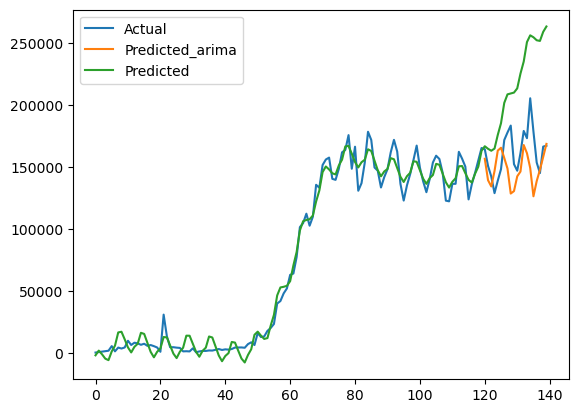

In [34]:
pyplot.plot(sales_df_conf.y, label='Actual')
pyplot.plot(pred_uc.predicted_mean, label='Predicted_arima')
pyplot.plot(forecast.yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
linx_t = sales_df_conf.iloc[-20:]

In [37]:
abc = forecast.iloc[-20:]

In [38]:
abc.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
120,2020-05-22,166871.026956,156771.272803,176742.290765,166871.026956,166871.026957,-247.412713,-247.412713,-247.412713,8286.410684,8286.410684,8286.410684,-8533.823397,-8533.823397,-8533.823397,0.0,0.0,0.0,166623.614243
121,2020-05-23,168296.290388,154676.076922,175190.784982,168296.290377,168296.290402,-3734.511123,-3734.511123,-3734.511123,1718.549446,1718.549446,1718.549446,-5453.060569,-5453.060569,-5453.060569,0.0,0.0,0.0,164561.779265
122,2020-05-24,169721.553820,153578.967803,173238.603542,169721.553786,169721.553854,-6722.396975,-6722.396975,-6722.396975,-4920.560064,-4920.560064,-4920.560064,-1801.836911,-1801.836911,-1801.836911,0.0,0.0,0.0,162999.156844
123,2020-05-25,171146.817251,154890.352089,174941.151805,171146.817192,171146.817314,-6399.137726,-6399.137726,-6399.137726,-8787.226759,-8787.226759,-8787.226759,2388.089033,2388.089033,2388.089033,0.0,0.0,0.0,164747.679525
124,2020-05-26,172572.080683,166150.569568,185347.025847,172572.080593,172572.080787,3179.210658,3179.210658,3179.210658,-3889.877810,-3889.877810,-3889.877810,7069.088468,7069.088468,7069.088468,0.0,0.0,0.0,175751.291341


In [39]:
linx_t.shape

(20, 2)

In [40]:
linx_t.head()

,ds,y
120,2020-05-22,164223
121,2020-05-23,150713
122,2020-05-24,142164
123,2020-05-25,128789
124,2020-05-26,138821


In [41]:
y = pred_uc.predicted_mean.astype('int64')

In [42]:
pred_uc.predicted_mean.shape

(20,)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(linx_t.y, y,  squared=False)

25207.045882054485

In [45]:
mean_squared_error(linx_t.y, abc.yhat,  squared=False)

61430.911501897375